In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Salary_Data.csv')
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
df.shape

(30, 2)

<AxesSubplot:>

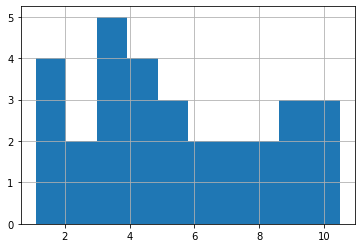

In [9]:
df['YearsExperience'].hist()

<AxesSubplot:>

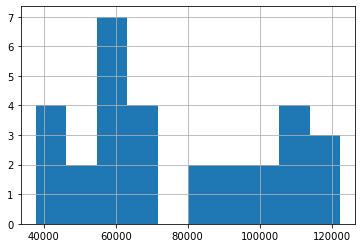

In [10]:
df['Salary'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x249f13c35e0>,
 'caps': [<matplotlib.lines.Line2D at 0x249f13c3ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249f13c3280>],
 'medians': [<matplotlib.lines.Line2D at 0x249f13cd3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x249f13cd700>],
 'means': []}

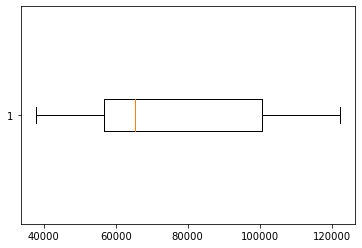

In [13]:
plt.boxplot(df['Salary'],vert=False)

<AxesSubplot:>

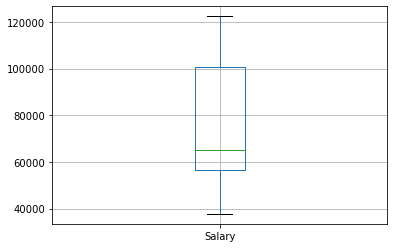

In [15]:
df.boxplot(column='Salary')

{'whiskers': [<matplotlib.lines.Line2D at 0x249f14ca460>,
 'caps': [<matplotlib.lines.Line2D at 0x249f14cab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x249f14ca100>],
 'medians': [<matplotlib.lines.Line2D at 0x249f14d6220>],
 'fliers': [<matplotlib.lines.Line2D at 0x249f14d6580>],
 'means': []}

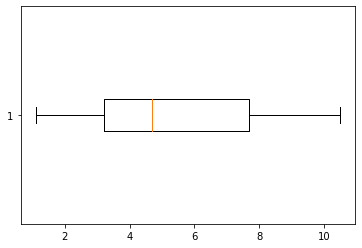

In [16]:
plt.boxplot(df['YearsExperience'],vert=False)

<AxesSubplot:>

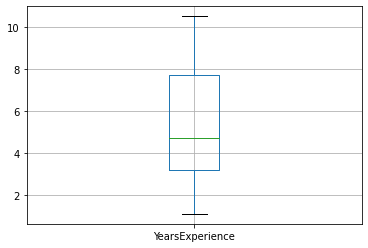

In [17]:
df.boxplot(column='YearsExperience')

In [19]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

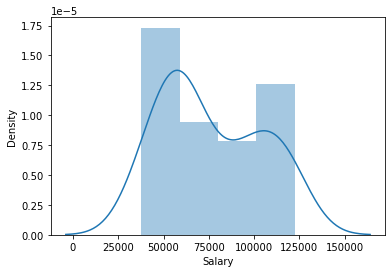

In [22]:
import seaborn as sns
sns.distplot(df['Salary'])


C:\Users\Sandy_Marcus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

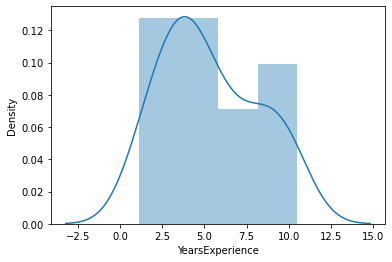

In [23]:
sns.distplot(df['YearsExperience'])

In [24]:
#Model building

In [28]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

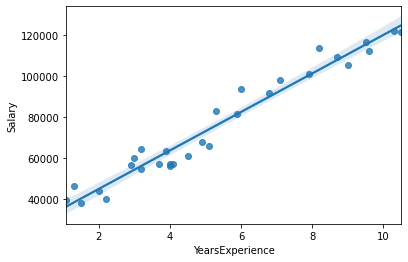

In [30]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [32]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [34]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [35]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [36]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.14e-20
Time:                        12:24:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
pred_data=pd.DataFrame(df)
model.predict(pred_data)


0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [46]:
#Transformation

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(df)

In [51]:
data=pd.DataFrame(data,index=df.index,columns=df.columns)
data.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [53]:
new_model=smf.ols('Salary~YearsExperience',data=data).fit()

In [54]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           1.14e-20
Time:                        12:30:38   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.551e-17      0.039  -1.42e-15      1.000      -0.080       0.080
YearsExperience     0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""